In [1]:
# run on bash:  sed 's/[\\(\\)]//g' postProcessing/forces/0/forces_0.125.dat > forces.dat

#bashCommand = ' sed \"s/[\\(\\)]//g\" postProcessing/forces/0/forces.dat > forces.dat ' 
#import subprocess
#process = subprocess.Popen(bashCommand.split(), stdout=subprocess.PIPE)
#output, error = process.communicate()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import re
import pandas as pd

In [2]:
%matplotlib notebook

In [3]:
#df = pd.read_csv( 'OF/force_0.dat'  , sep=" |\(|\)" , header= 2 
# df = pd.read_csv( 'OF/trial.dat'  , sep="\s+|[(,)]" , header= 3 ) # , engine='python' )
df = pd.read_csv( 'OF/wedge/force2.dat'  , sep="\s+|[(,)]" , header= 3 )

<ipython-input-3-e4c31bf54ad4>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv( 'OF/wedge/force2.dat'  , sep="\s+|[(,)]" , header= 3 )


In [9]:
df2 = pd.read_csv( 'OF/wedge/force.dat'  , sep="\s+|[(,)]" , header= 3 )

<ipython-input-9-548fffeb6fd1>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df2 = pd.read_csv( 'OF/wedge/force.dat'  , sep="\s+|[(,)]" , header= 3 )


In [4]:
df

,#,Time,Unnamed: 2,total_x,total_y,total_z,Unnamed: 6,Unnamed: 7,pressure_x,pressure_y,pressure_z,Unnamed: 11,Unnamed: 12,viscous_x,viscous_y,viscous_z,Unnamed: 16
0,0.001,NaN,0.000034,-0.037026,4.757976e-22,NaN,NaN,0.000034,-0.037025,-1.462647e-23,NaN,NaN,-7.065632e-08,-9.759465e-07,4.904240e-22,NaN,NaN
1,0.002,NaN,-0.000002,0.002545,1.336669e-21,NaN,NaN,-0.000002,0.002546,8.848053e-25,NaN,NaN,-6.200917e-08,-8.446402e-07,1.335784e-21,NaN,NaN
2,0.003,NaN,-0.000002,0.002249,1.336966e-21,NaN,NaN,-0.000002,0.002250,7.259047e-25,NaN,NaN,-5.714234e-08,-7.419615e-07,1.336240e-21,NaN,NaN
3,0.004,NaN,-0.000001,0.001883,1.337466e-21,NaN,NaN,-0.000001,0.001884,5.084006e-25,NaN,NaN,-5.279360e-08,-6.613505e-07,1.336957e-21,NaN,NaN
4,0.005,NaN,-0.000001,0.001532,1.340076e-21,NaN,NaN,-0.000001,0.001532,4.898381e-25,NaN,NaN,-4.917315e-08,-5.981629e-07,1.339586e-21,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12982,12.983,NaN,0.000325,-0.011524,4.918432e-21,NaN,NaN,0.000252,-0.011519,2.249445e-24,NaN,NaN,7.303331e-05,-4.261251e-06,4.916183e-21,NaN,NaN
12983,12.984,NaN,0.000324,-0.011385,4.938596e-21,NaN,NaN,0.000251,-0.011381,2.238964e-24,NaN,NaN,7.323537e-05,-4.194022e-06,4.936357e-21,NaN,NaN
12984,12.985,NaN,0.000323,-0.011244,4.939142e-21,NaN,NaN,0.000249,-0.011240,1.986666e-24,NaN,NaN,7.343684e-05,-4.125242e-06,4.937155e-21,NaN,NaN
12985,12.986,NaN,0.000322,-0.011102,4.952607e-21,NaN,NaN,0.000248,-0.011098,2.392627e-23,NaN,NaN,7.363780e-05,-4.054980e-06,4.928680e-21,NaN,NaN


In [5]:
angle = 5  # wedge angle in deg

rho = 998.8  # fluid density

In [6]:
t_all  = df.iloc[:,0].values
fz_all = df.iloc[:,3].values  * rho * 360 / angle


In [7]:
fz_all

array([-2662.65320217,   183.02219601,   161.73465149, ...,
        -808.62435321,  -798.38614493,  -788.41544589])

In [8]:
t_all

array([1.0000e-03, 2.0000e-03, 3.0000e-03, ..., 1.2985e+01, 1.2986e+01,
       1.2987e+01])

In [11]:
t_all2  = df2.iloc[:,0].values
fz_all2 = df2.iloc[:,3].values  * rho * 360 / angle


<IPython.core.display.Javascript object>


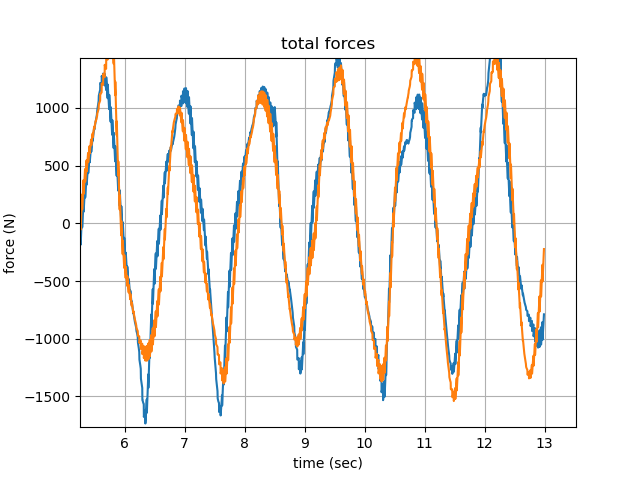

In [25]:
fig, ax = plt.subplots()


ax.set_xlabel('time (sec)')
ax.set_ylabel('force (N)')
ax.grid(True)
ax.set_title('total forces')

ax.plot( t_all , fz_all, label=' finer ' )
ax.plot( t_all2 , fz_all2, label=' coarser '  )


In [10]:
# Time increments - just to check equally spaced times. Interpolation must be used otherwise

ddt = t_all[ 0 : -1 ] - t_all[ 1 : ]

<IPython.core.display.Javascript object>


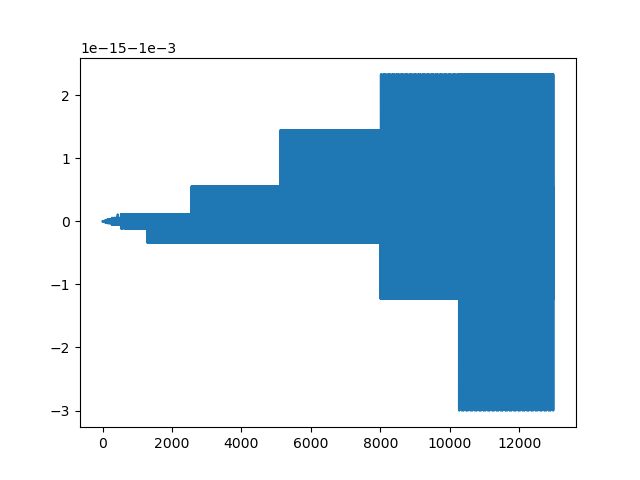

In [12]:
plt.plot(ddt)

In [13]:
f0 = 0.25 * 3.08 # 1.6 # 3.08 # 1.6 # 3.08 # 
T0 = 1 / f0

In [23]:
T0

1.2987012987012987

select relevant part of time signal

In [15]:
n_window = 4  # cycles
T_window = n_window *  T0

dt = t_all[-1] - t_all[-2]

N_w = int( T_window / dt )

In [16]:
dt = t_all[100] - t_all[99]

dt

0.000999999999999987

In [17]:
N_w

5194

In [18]:
len( t_all )

12987

In [19]:
t = np.array( t_all[-N_w:] , copy=True )
t -= t[0]
fz = np.array( fz_all[-N_w:] , copy=True )
lth = t.size

In [20]:
t.size

5194

<IPython.core.display.Javascript object>


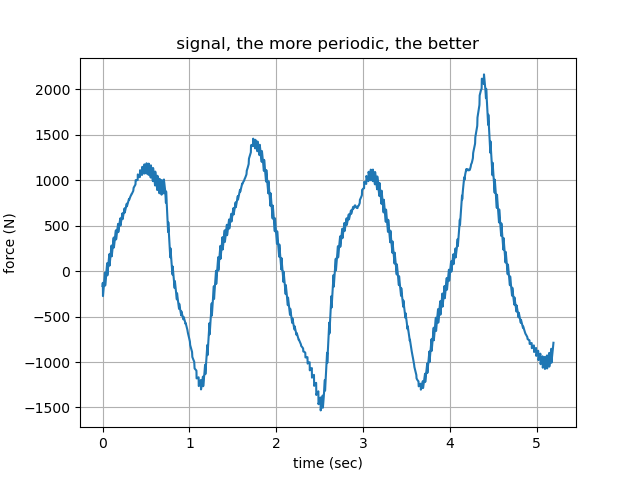

In [22]:
plt.xlabel('time (sec)')
plt.ylabel('force (N)')
plt.grid(True)
plt.title(' signal, the more periodic, the better ')

plt.plot(t , fz )



# Analysis


In [20]:
# TODO: read these from OpenFOAM files !

A = 0.1 / 1         # amplitude of motion

D_d = 1       # plate diameter
D_c = 0.35       # cylinder diameter

t_d = 0.005 # plate width


#rho = 998.8  # water density
# g = 9.81     # accel. of gravity

# f0 = 1/ 4  * 3.08
omega = 2* np.pi * f0   # angular freq of motion
z0 = 0.775          # mean depth

S_d = np.pi * ( D_d / 2) **2  # plate area
S_w = np.pi * ( D_c / 2) **2  # waterplane area


force_scale = 0.5 * rho * ( omega * A )**2 * S_d

KC = 2* np.pi * A / D_d
nu = 1e-5
f0 = omega/ (2*np.pi)
beta = f0 * D_d**2 / nu


In [21]:
KC

0.6283185307179586

In [22]:
omega

4.838052686528282

In [23]:
2*np.pi/omega

1.2987012987012987

In [24]:
#A_33th = (1/3)*rho*D_d**3
A_33th = (1/3)*rho*D_d**3  *  0.9  #  10% correction factor
print( A_33th )

299.64


In [25]:
zz =  -z0 + A * np.sin( omega * t)

F_K = - (  ( zz + t_d / 2  ) * S_w  -       S_d * t_d            ) * rho * g

#   minus    submerged  cylinder           plate volume (completely submerged)

#F_K = -zz * S_w * rho * g

NameError: name 'g' is not defined

<IPython.core.display.Javascript object>


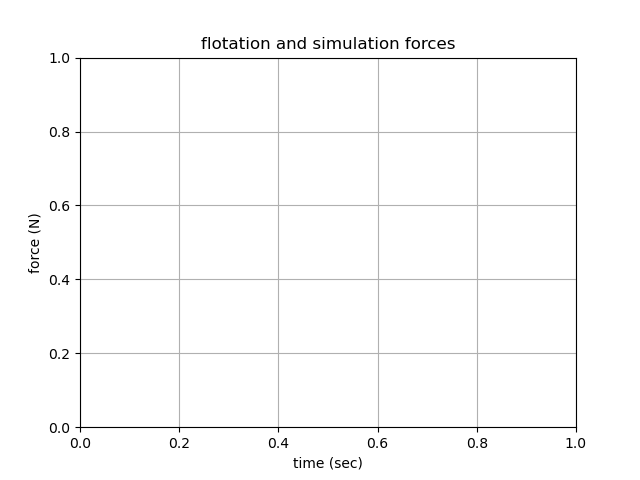

NameError: name 'F_K' is not defined

In [28]:
plt.clf()
plt.xlabel('time (sec)')
plt.ylabel('force (N)')
plt.grid(True)
plt.title('flotation and simulation forces')
plt.plot(t, F_K, label='flot')
plt.plot(t, fz ,'-', label='simu')
plt.show()

In [26]:
FH = fz  #  - F_K  # forget flotation !!


FC = FH / force_scale 

<IPython.core.display.Javascript object>


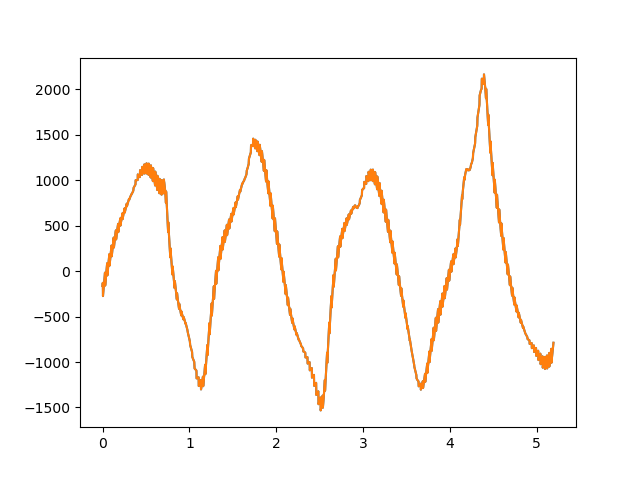

In [27]:
plt.plot(t, FH, label='hydro')
plt.plot(t, FH)
plt.show()

In [146]:
(80 + 52)/2

66.0

<IPython.core.display.Javascript object>


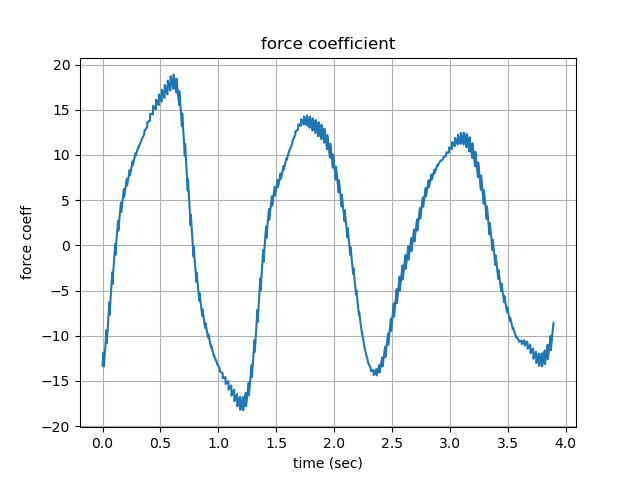

In [30]:
plt.clf()
plt.xlabel('time (sec)')
plt.ylabel('force coeff')
plt.grid(True)
plt.title('force coefficient')
plt.plot(t, FC ) # , label='flot')
#plt.plot(t, fz ,'x-', label='simu')
plt.show()

In [37]:
t[-1]

5.1930000000000005

In [28]:
dt = t[-1] / (lth - 1)   # sampling dt

sr = 1/ dt  # sampling rate

print(dt)

0.001


In [29]:
# real FFT

freq0  = np.fft.rfftfreq( lth , dt ) # / ( 2* np.pi ) )
FH_tilde = np.fft.rfft( FH ) / lth

In [40]:
# complex FFT

#freq0  = np.fft.fftfreq( lth , dt )
#FH_tilde = np.fft.fft( FH ) / lth

In [30]:
freq  = freq0
omegas= ( 2* np.pi ) * freq

In [31]:
FH_mean = abs( FH_tilde[0] )

print( 'FH_mean (offset): '  , FH_mean  )

FH_mean (offset):  126.76060899417521


<IPython.core.display.Javascript object>


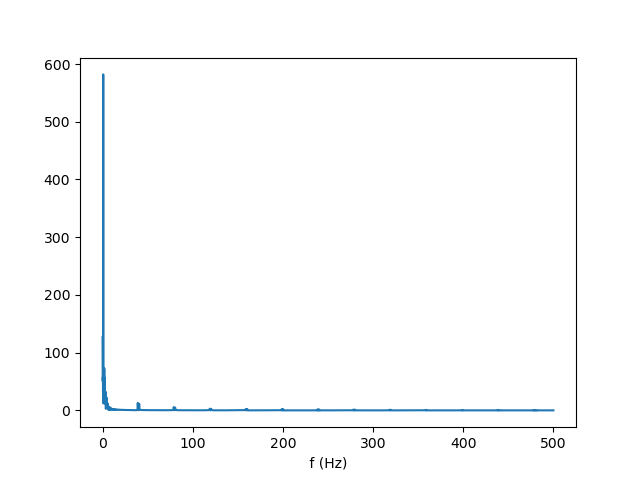

In [32]:
plt.clf()
plt.xlabel(' f (Hz) ')
plt.plot( freq , abs( FH_tilde ) )
plt.show()

<IPython.core.display.Javascript object>


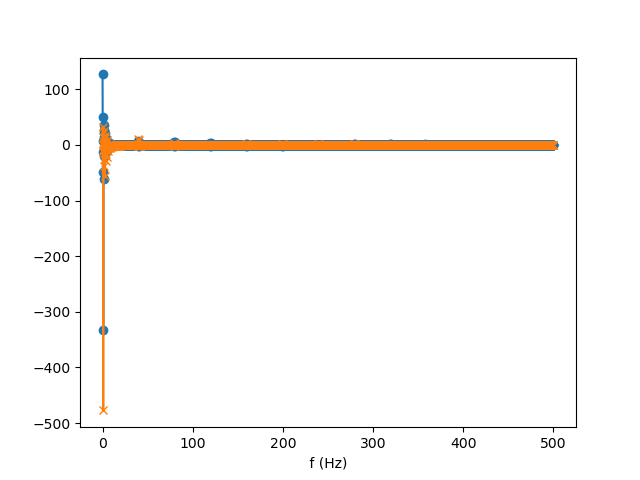

In [33]:
plt.clf()
plt.xlabel(' f (Hz) ')
plt.plot( freq , FH_tilde.real  , 'o-' , label='real')
plt.plot( freq , FH_tilde.imag  , 'x-' , label='imag')  # 2 factor: DFT values are "duplicated" at -ve and +ve freqs.
plt.show()

In [40]:
# values from DFT graph

A_re =  -193 * 2
A_im =  -284 * 2

Automated mins. Use with care!


In [34]:
min_i = np.argmin( FH_tilde.real )

In [35]:
A_re = FH_tilde.real[ min_i ] * 2
A_im = FH_tilde.imag[ min_i ] * 2

print('Real min at frequency ' , freq[ min_i ] , ', expected at ' , f0 , '\n  Re = ' , A_re , ' Im = ' , A_im )


Real min at frequency  0.7701193685021178 , expected at  0.77 
  Re =  -666.1123579773584  Im =  -954.6796483670444


<IPython.core.display.Javascript object>


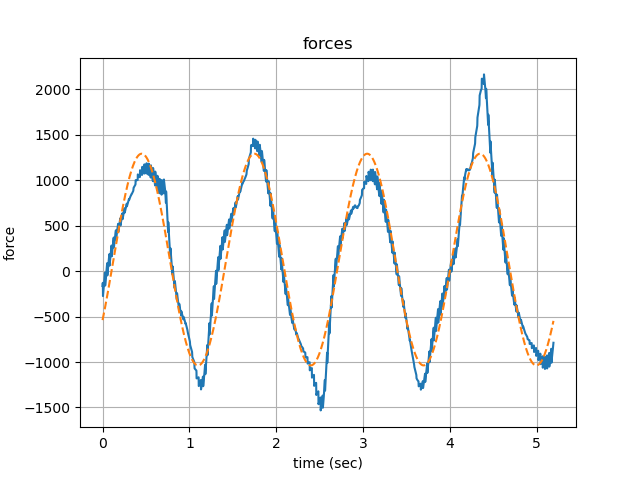

In [36]:
#f0= 0.25 * 3.08

plt.clf()
plt.xlabel('time (sec)')
plt.ylabel('force')
plt.grid(True)
plt.title('forces')
plt.plot(t, FH ) # , label='flot')
plt.plot(t,
         FH_mean +
         A_re * np.cos( 2 * np.pi * f0 * t ) -
         A_im * np.sin( 2 * np.pi * f0 * t )         
         ,'--', label='DFT')
plt.show()

In [37]:
v0 = A * omega
a0 = v0 * omega

# sin displ
B_33 = - A_re / v0  # sign ??
# -cos displ
#B_33 =  A_im / v0


print( 'B_33 = ' , B_33 )

# sin displ
A_33 = - A_im / a0
# -cos displ
#A_33 = - A_re / a0

print( 'A_33 = ' , A_33 )

B_33 =  1376.8191483986323
A_33 =  407.86503614353074


In [38]:
C_a = A_33 / A_33th

C_b = B_33 / (omega * A_33th)

print( 'KC= ' , KC , ' C_a= ' , C_a , ' C_b= ' , C_b )

KC=  0.6283185307179586  C_a=  1.3611835407273087  C_b=  0.9497439057224346


In [39]:
C_d = 3*B_33/ (rho* f0 * D_d**3 * KC )
print( 'KC ' , KC , ' ;    C_d = ' , C_d ) 

KC  0.6283185307179586  ;    C_d =  8.54769515150191


In [40]:
KC

0.6283185307179586